In [1]:
# Regresion simple de los datos de gastos en salud mex y ch
import pandas as pd

df_mex=pd.read_excel('../../data/raw/gasto_salud_mexico.xlsx')
print(df_mex.head())
df_mex['Gasto USD']=df_mex['Gasto miilones dolares']*1e6
df_mex=df_mex.drop(['Gasto miilones dolares'],axis=1)
df_mex.to_csv('../../data/processed/salud/mexico_gasto.csv',index=False)


    Año  Gasto miilones dolares
0  2004                 34372.5
1  2005                 34437.2
2  2006                 38459.5
3  2007                 41664.5
4  2008                 45615.7


In [2]:
df_ch=pd.read_csv('../../data/raw/gasto_salud_chile.csv')
print(df_ch.head())
df_ch['Gasto USD']=df_ch['Valor millones dolares']*1e6
df_ch=df_ch.drop(['Valor millones dolares'],axis=1)
df_ch.to_csv('../../data/processed/salud/chile_gasto.csv',index=False)

    Año  Valor millones dolares
0  2004                    6493
1  2005                    6944
2  2006                    8485
3  2007                    9633
4  2008                   10637


In [3]:
df = pd.read_csv('../../data/processed/salud/mexico_gasto.csv')
df['USD mex']=df['Gasto USD']
df=df.drop(['Gasto USD'],axis=1)
df['USD ch']=pd.read_csv('../../data/processed/salud/chile_gasto.csv')['Gasto USD']

In [4]:
df['dS/dt (mex)']=df['USD mex'].diff().fillna(0)
df['dS/dt (ch)']=df['USD ch'].diff().fillna(0)
df.to_csv('../../data/processed/salud/unified.csv')

In [24]:
# Regresion Chile

import statsmodels.api as sm
index=df['Año']-2004
x_G=index
x_G=sm.add_constant(x_G,prepend=False)
y_G=df['USD ch']
modelo_ch=sm.OLS(y_G,x_G).fit()
print(modelo_ch.summary())

# Regresion mexico

y_G=df['USD mex']
modelo_mex=sm.OLS(y_G,x_G).fit()
print(modelo_mex.summary())



                            OLS Regression Results                            
Dep. Variable:                 USD ch   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     462.0
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           9.20e-14
Time:                        22:10:40   Log-Likelihood:                -430.44
No. Observations:                  19   AIC:                             864.9
Df Residuals:                      17   BIC:                             866.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Año         1.589e+09   7.39e+07     21.493      0.0

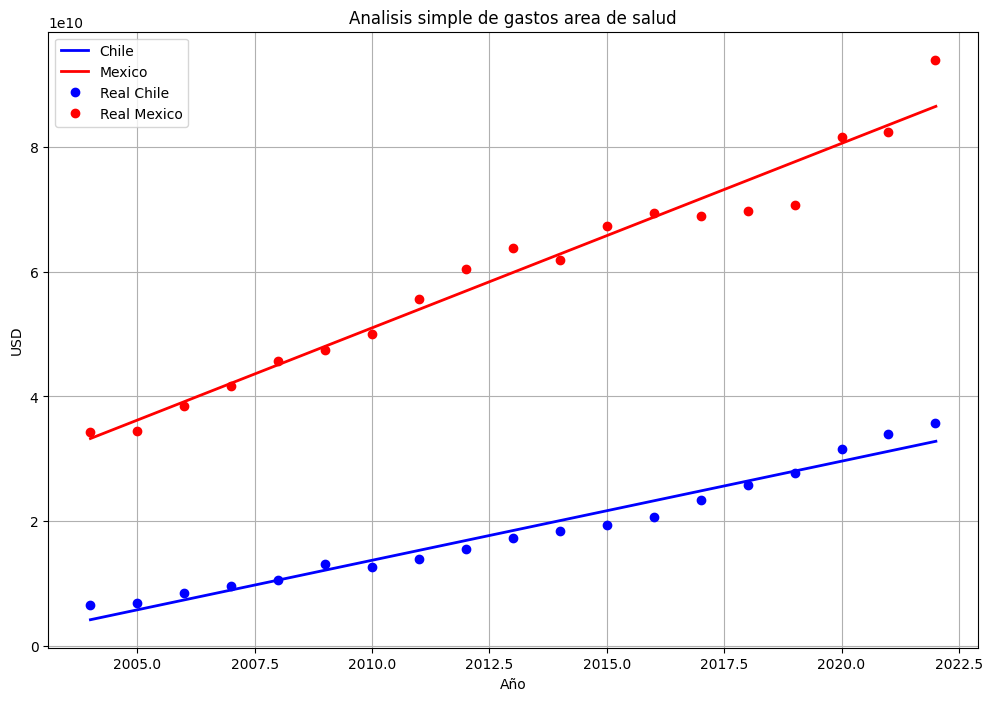

In [27]:
import numpy as np
import matplotlib.pyplot as plt
def modelo(t):
    c1=1.589e+09
    const1=4.201e+09
    c2=2.958e+09
    const2=3.326e+10

    G_ch=c1*t+const1
    G_mex=c2*t+const2
    
    return [G_ch,G_mex]


t0,tf,h = 0, 18, 0.01

t=np.arange(t0,tf+h,h)

x_ch, x_mex=modelo(t)
t=t+2004
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(t,x_ch,'b-',linewidth=2,label='Chile')
ax.plot(t,x_mex,'r-',linewidth=2,label='Mexico')

ax.plot(df['Año'],df['USD ch'],'bo',markersize=6,label='Real Chile')
ax.plot(df['Año'],df['USD mex'],'ro',markersize=6,label='Real Mexico')

ax.set_title('Analisis simple de gastos area de salud')
ax.set_xlabel('Año')
ax.set_ylabel('USD')
ax.grid(True)
ax.legend()
plt.show()